In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
dataset = pd.read_csv("data.csv")
dataset.head()
stock = dataset

In [3]:
stock.Date = pd.to_datetime(stock.Date, format='%Y%m%d', errors='ignore')



In [4]:
stock = stock.dropna()
stock = stock[['Date','Open', 'High', 'Low', 'Close']]
    

In [5]:

stock.head()
stock.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [6]:
stock = stock.groupby('Date')['Close'].sum().reset_index()
stock.head()

,Date,Close
0,2012-01-01,879.0
1,2012-01-02,900.0
2,2012-01-03,892.0
3,2012-01-04,865.0
4,2012-01-05,858.0


In [7]:

stock = stock.set_index('Date')
stock.index

Index(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05',
       '2012-01-08', '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
       ...
       '2020-03-05', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-15',
       '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-22'],
      dtype='object', name='Date', length=1901)

In [8]:
stock.index = pd.to_datetime(stock.index)

monthly_mean = stock.Close.resample('M').mean()

In [9]:
monthly_mean['2018':]

Date
2018-01-31    1056.578947
2018-02-28    1078.555556
2018-03-31    1009.222222
2018-04-30    1002.095238
2018-05-31    1000.619048
2018-06-30     951.263158
2018-07-31     912.173913
2018-08-31     927.142857
2018-09-30     964.105263
2018-10-31     943.500000
2018-11-30     912.421053
2018-12-31     858.000000
2019-01-31     839.913043
2019-02-28     800.578947
2019-03-31     706.526316
2019-04-30     792.761905
2019-05-31     842.714286
2019-06-30     815.842105
2019-07-31     802.608696
2019-08-31     782.904762
2019-09-30     765.318182
2019-10-31     763.928571
2019-11-30     748.900000
2019-12-31     721.956522
2020-01-31     726.818182
2020-02-29     763.000000
2020-03-31     794.500000
Freq: M, Name: Close, dtype: float64

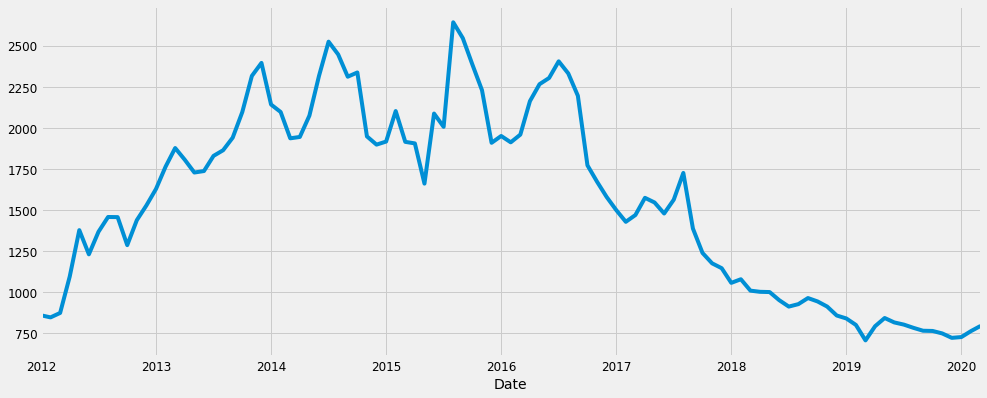

In [10]:
monthly_mean.plot(figsize=(15, 6))
plt.show()

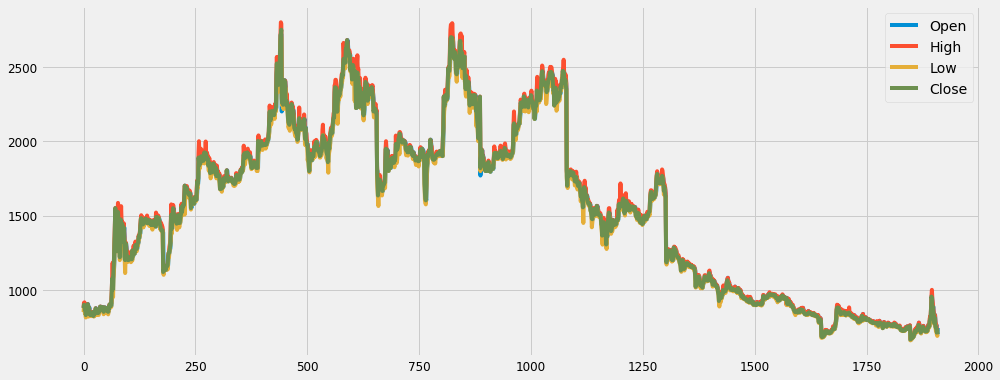

In [11]:
dataset.plot(figsize=(15, 6))
plt.show()

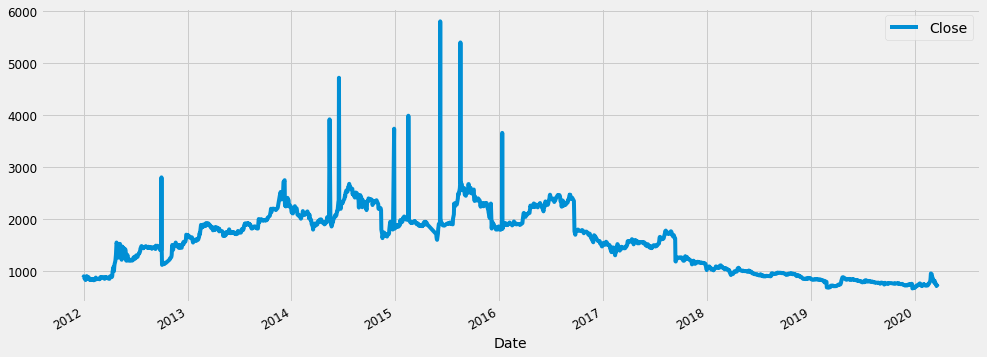

In [12]:
stock.plot(figsize=(15, 6))
plt.show()


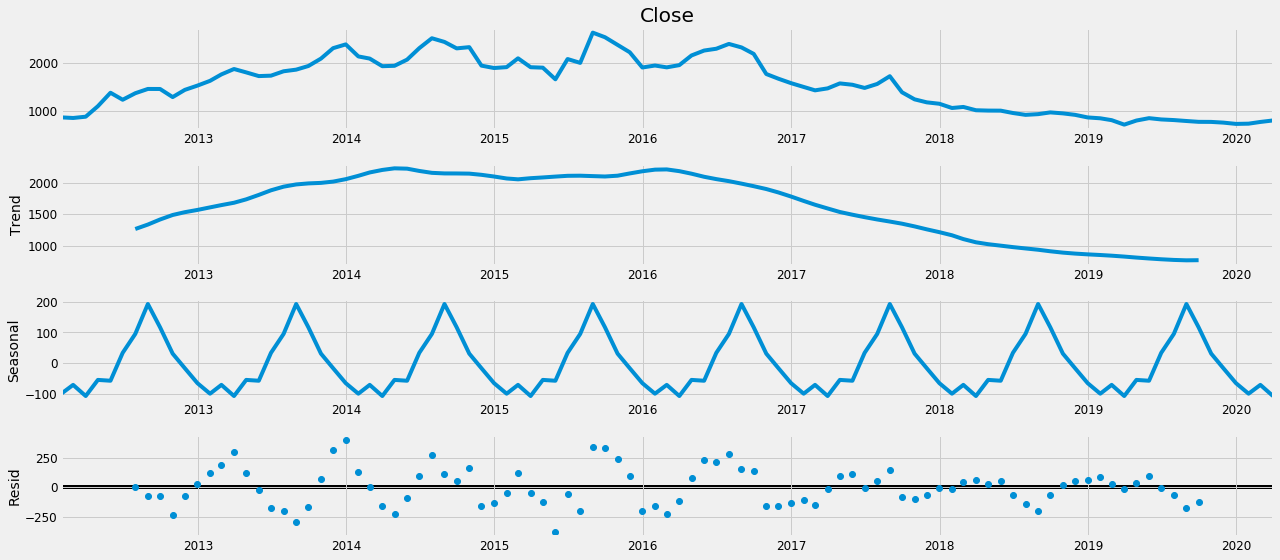

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(monthly_mean, model='additive')
fig = decomposition.plot()
plt.show()

In [14]:

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [15]:
l_param = []
l_param_seasonal=[]
l_results_aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            l_param.append(param)
            l_param_seasonal.append(param_seasonal)
            l_results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1733.423827268475
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1432.2523767541113
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1300.8163992415214
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1099.4992126823595
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1315.4920447475058


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1292.4994817452434
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1112.610666498963
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1100.1315500799235
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1600.1463901812558
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1330.462863690429
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1222.3808662773565
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1044.2145980596624
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1253.454458330549


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1225.199568742484
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1071.0571182479587
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1045.5661006404318
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1250.253225761064
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1097.500887639873
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1154.2244504280854
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:956.9666414459842
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1110.3566578095413
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1099.4737519554033
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:986.989842064972
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:958.9604326717495
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1239.9194804290992
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1086.903708428976
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1143.2040877274658
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:945.3852122719377
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1112.1238155669212
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1088.8088775026106
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:988.5448650197516
AR

In [16]:
minimum=l_results_aic[0]
for i in l_results_aic[1:]:
    if i < minimum: 
        minimum = i
i=l_results_aic.index(minimum)

In [17]:
mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                order=l_param[i],
                                seasonal_order=l_param_seasonal[i],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9309      0.066     14.171      0.000       0.802       1.060
ma.L1         -1.0000    857.247     -0.001      0.999   -1681.174    1679.174
ma.S.L12      -1.0000    857.283     -0.001      0.999   -1681.244    1679.244
sigma2      1.997e+04      0.002   9.89e+06      0.000       2e+04       2e+04


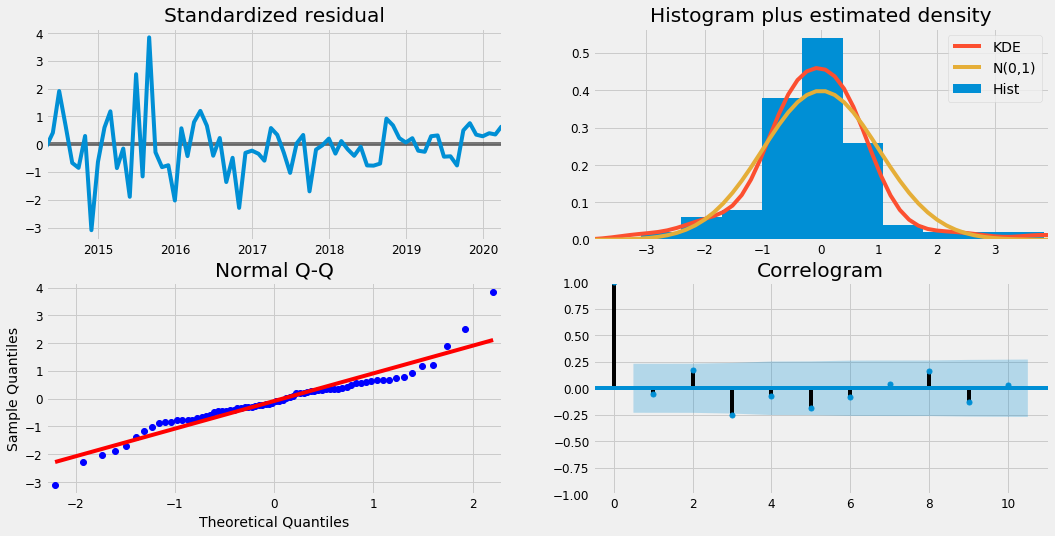

In [18]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

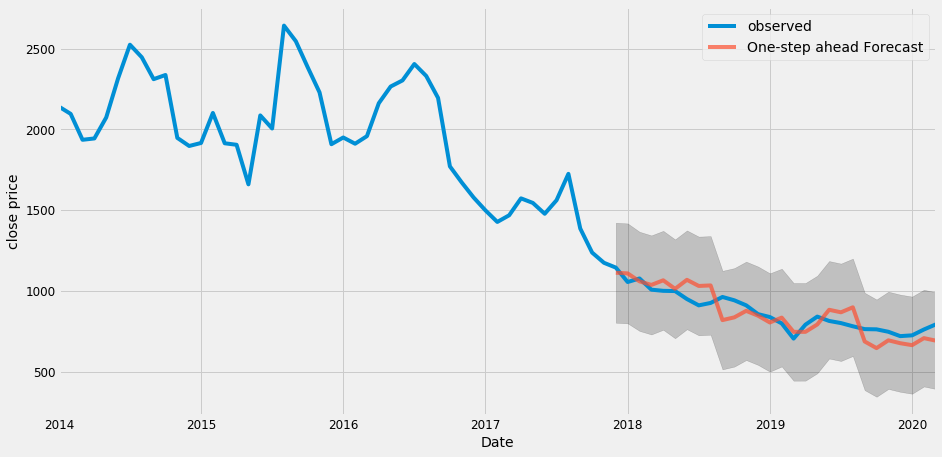

In [19]:
pred = results.get_prediction(start=pd.to_datetime('2017-12-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = monthly_mean['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('close price')
plt.legend()

plt.show()

In [27]:
y_forecasted = pred.predicted_mean
y_truth = monthly_mean['2020-1-31':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 5536.46


In [28]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 74.41


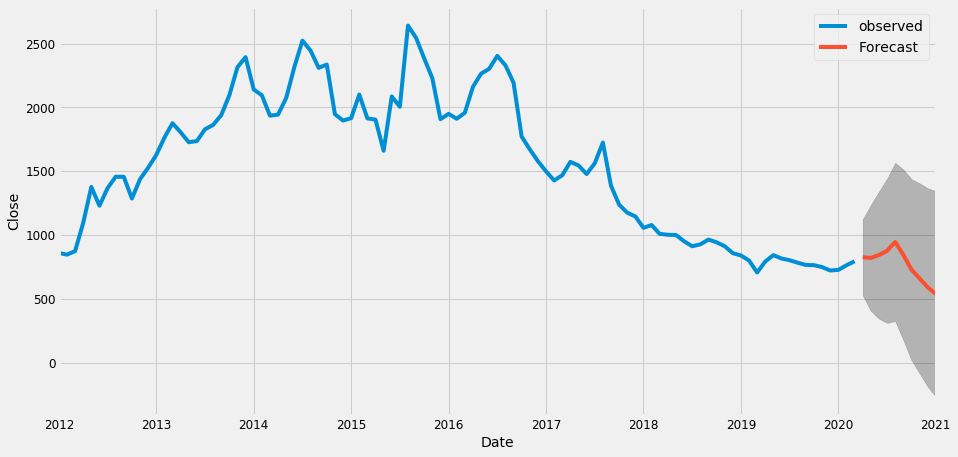

In [22]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()

ax = monthly_mean.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Close')

plt.legend()
plt.show()

In [23]:
print(pred_ci)

            lower Close  upper Close
2020-04-30   527.920224  1125.079605
2020-05-31   406.260355  1235.133321
2020-06-30   345.079142  1341.716267
2020-07-31   311.327846  1441.463893
2020-08-31   325.351936  1566.517973
2020-09-30   177.285184  1513.213303
2020-10-31    20.517537  1438.712894
2020-11-30   -84.629838  1405.854813
2020-12-31  -187.340886  1367.246247
2021-01-31  -267.664993  1344.185868
